In [4]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns


total_hora = total_hora_trabalhada = np.array(df['Horas Trabalhadas']).sum()
media_diaria_horas = total_hora / len(df)
bugs_corrigidos = np.array(df['Bugs Corrigidos']).sum()
media_bugs_corrigidos = bugs_corrigidos / len(df)
total_tarefas_concluidas = np.array(df['Tarefas Concluidas']).sum()
media_diaria_tarefas_concluidas = total_tarefas_concluidas / len(df)
produtividade_diaria = total_tarefas_concluidas / total_hora


#Total de horas trabalhadas com método sum:
display(Markdown(f"**Total de horas trabalhadas:** {total_hora} horas"))
#Media diária de horas trabalhadas:
display(Markdown(f'**Media de horas trabalhadas:** {media_diaria_horas:.2f} hours'))
#Total de bugs corrigidos:
display(Markdown(f'**Total de bugs corrigidos:** {bugs_corrigidos}'))
#Media de bugs corrigidos:
display(Markdown(f'**Média de bugs corrigidos por dia:** {media_bugs_corrigidos:.2f}'))
#Total de tarefas concluidas:
display(Markdown(f'**Total de tarefas concluidas:** {total_tarefas_concluidas}'))
#Media diaria Tarefas Concluidas:
display(Markdown(f'**Média diária de tarefas concluidas:** {media_diaria_tarefas_concluidas:.2f}'))
#Produtividade Diária (Tarefas Concluídas por Hora):
display(Markdown(f'**Produtividade Diária (Tarefas Concluídas por Hora):** {produtividade_diaria:.2f}'))

**Total de horas trabalhadas:** 48.0 horas

**Media de horas trabalhadas:** 8.00 hours

**Total de bugs corrigidos:** 33

**Média de bugs corrigidos por dia:** 5.50

**Total de tarefas concluidas:** 62

**Média diária de tarefas concluidas:** 10.33

**Produtividade Diária (Tarefas Concluídas por Hora):** 1.29

Imaginando que em um dia a meta é atingir 1 tarefa por cada hora trabalhada, no qual seria 100% de aproveitamento temos o seguinte cálculo para porcentagem:

1 tarefa em 1 hora = 100% de aproveitamento

A média de aproveitamento no total é de 0,67 ou seja, necessário mais do que 1 hora para concluir uma tarefa ou, em uma hora é concluído 67% de uma tarefa.

1) Foi selecionado os 3 dias mais produtivos e temos:

In [ ]:
#pegando os 3 dias mais produtivos ACIMA DA MÉDIA DE PRODUTIVIDADE

df['Produtividade'] = df['Tarefas Concluidas'] / df['Horas Trabalhadas']

df_mais_produtivo = df[df['Produtividade']>produtividade_diaria]
df_sorted = df_mais_produtivo.sort_values(by='Produtividade', ascending=False)
df_top_3 = df_sorted.head(3)

display(Markdown(f'**Top 3 dias mais produtivos acima da média(0.67):**'))
display(df_top_3)

**Top 3 dias mais produtivos acima da média(0.67):**

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluidas,Produtividade
0,Segunda,6,3,5,0.833333
2,Quarta,8,1,6,0.750000
4,Sexta,7,3,5,0.714286


2) Selecionar os 3 dias menos produtivos abaixo da média (0.67):

In [ ]:
#selecionar os 3 dias menos produtivos menor que a produtividade diaria (0.67)

df_menos_produtivo = df[df['Produtividade'] < produtividade_diaria]
df_menos_produtivo = df_menos_produtivo.sort_values(by='Produtividade', ascending=True).head(3)

display(Markdown(f'**Top 3 dias menos produtivos abaixo da média(0.67):**'))
display(df_menos_produtivo)

**Top 3 dias menos produtivos abaixo da média(0.67):**

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluidas,Produtividade
6,Domingo,4,1,2,0.500000
1,Terça,7,2,4,0.571429
5,Sábado,5,2,3,0.600000


segue o gráfico abaixo, ilustrando a situação de cima.

In [ ]:
#Usando o DataFrame df_top_3: coloca o eixo x no intervalo entre 0.4 e 0.7


chart = alt.Chart(df_menos_produtivo).mark_bar().encode(
    x=alt.X('Produtividade:Q', title='Produtividade (%)', scale=alt.Scale(domain=[0.4, 0.7])),
    y='Dia:N',
    color='Dia:N',
)
chart

alt.Chart(...)

3) Selecionar as horas trabalhadas por dia:

In [ ]:
# Definir a coluna 'Dia' como índice
df.set_index('Dia', inplace=True)

# Selecionar apenas a coluna 'Horas Trabalhadas'
df_horas_trabalhadas = df[['Horas Trabalhadas']]
df_horas_trabalhadas

,Horas Trabalhadas
Dia,
Segunda,6
Terça,7
Quarta,8
Quinta,6
Sexta,7
Sábado,5
Domingo,4


Segue o gráfico abaixo:

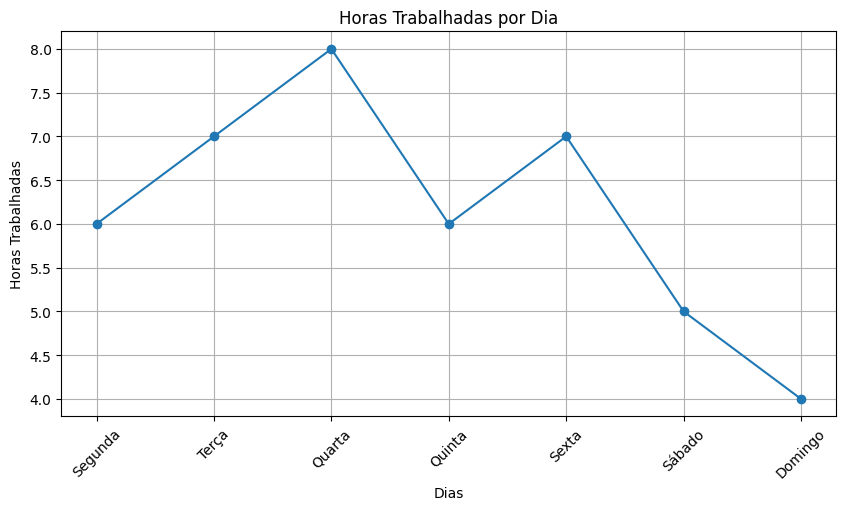

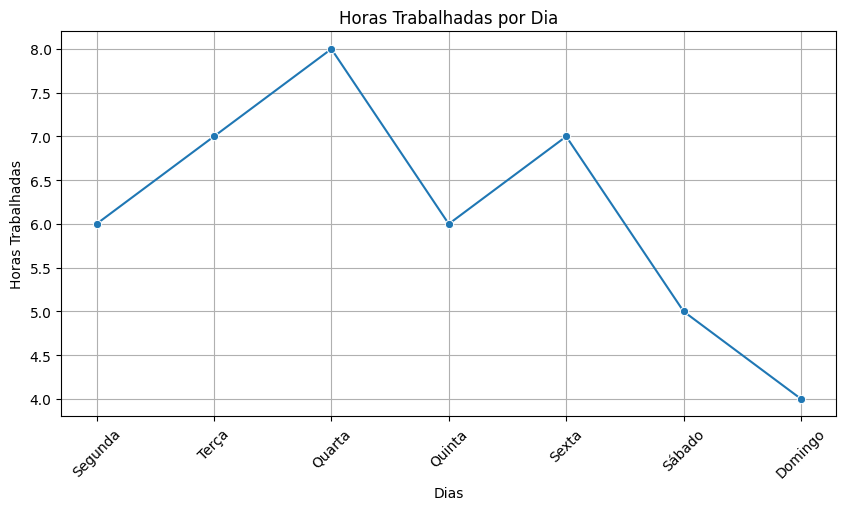

In [ ]:
# Usando matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df_horas_trabalhadas.index, df_horas_trabalhadas['Horas Trabalhadas'], marker='o')

plt.title('Horas Trabalhadas por Dia')
plt.xlabel('Dias')
plt.ylabel('Horas Trabalhadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Usando seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_horas_trabalhadas.index, y='Horas Trabalhadas', data=df_horas_trabalhadas, marker='o')

plt.title('Horas Trabalhadas por Dia')
plt.xlabel('Dias')
plt.ylabel('Horas Trabalhadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()